In [75]:
import os
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True)

In [76]:
base_path = os.path.abspath('../..')
data_path = os.path.join(base_path, 'data')
database_path = os.path.join(data_path, 'database')
strategy_path = os.path.join(base_path, 'strategy')
check_path = os.path.join(strategy_path, 'check')
sys.path.append(strategy_path)

In [77]:
from strategy import CommodityStrategy, EquityStrategy, IRStrategy, EmergingStrategy
from tester import Tester

In [78]:
start_date = '2001-01-01'
end_date = '2019-12-31'

performances = []
summaries = []
TS_positions = {}
CS_positions = {}

In [79]:
# 각 자산군
emerging_list = ["EMDY", "EMPE", "EMPM", "EMSS", "EMCA"]
ir_list = ['ICA', 'ICA2', 'IEQ', 'IPM', 'IRV', 'ISS']
commodity_list = ["CPM", "CVA", "CVA2", "CSS", "CVO", "CCA3", "CVA3"]
equity_list = ["EEM", "EDY", "EFX", "ELQ", "EPE", "EQL", "EPM", "ESS", "EST", "EVO"]

In [80]:
# 각 전략 load를 위해 자산군별로 객체 생성
obj_dict = {
    'I': IRStrategy('IR_ALL', asset_type = 'IR'),
    'C': CommodityStrategy('COMMODITY_ALL', asset_type = 'COMMODITY'),
    'EM': EmergingStrategy('EMERGING_ALL', asset_type = 'EMERGING'), 
    'E': EquityStrategy('EQUITY_ALL', asset_type = 'EQUITY')
}

2020-02-24 09:14:00,930 - IR_ALL - INFO - [STEP 0] START LOGGING IR_ALL
2020-02-24 09:14:00,930 - IR_ALL - INFO - [STEP 0] START LOGGING IR_ALL
2020-02-24 09:14:00,934 - COMMODITY_ALL - INFO - [STEP 0] START LOGGING COMMODITY_ALL
2020-02-24 09:14:00,934 - COMMODITY_ALL - INFO - [STEP 0] START LOGGING COMMODITY_ALL
2020-02-24 09:14:00,936 - EMERGING_ALL - INFO - [STEP 0] START LOGGING EMERGING_ALL
2020-02-24 09:14:00,936 - EMERGING_ALL - INFO - [STEP 0] START LOGGING EMERGING_ALL
2020-02-24 09:14:00,939 - EQUITY_ALL - INFO - [STEP 0] START LOGGING EQUITY_ALL
2020-02-24 09:14:00,939 - EQUITY_ALL - INFO - [STEP 0] START LOGGING EQUITY_ALL


In [81]:
for v in obj_dict.values():
    v.load_index_and_return(from_db = True, save_file = False)

2020-02-24 09:14:02,230 - IR_ALL - INFO - [STEP 1] LOAD DATA
2020-02-24 09:14:02,230 - IR_ALL - INFO - [STEP 1] LOAD DATA
2020-02-24 09:14:02,232 - IR_ALL - INFO - [STEP 1 - 1] CONNECT TO BLOOM DATABASE
2020-02-24 09:14:02,232 - IR_ALL - INFO - [STEP 1 - 1] CONNECT TO BLOOM DATABASE
2020-02-24 09:14:02,238 - IR_ALL - INFO - [STEP 1 - 2] GET DATA FROM BLOOM DATABASE
2020-02-24 09:14:02,238 - IR_ALL - INFO - [STEP 1 - 2] GET DATA FROM BLOOM DATABASE
2020-02-24 09:14:06,541 - IR_ALL - INFO - [STEP 1 - 3] CHANGE BLOOM DATA INTO STANDARD FORMAT
2020-02-24 09:14:06,541 - IR_ALL - INFO - [STEP 1 - 3] CHANGE BLOOM DATA INTO STANDARD FORMAT
2020-02-24 09:14:06,605 - COMMODITY_ALL - INFO - [STEP 1] LOAD DATA
2020-02-24 09:14:06,605 - COMMODITY_ALL - INFO - [STEP 1] LOAD DATA
2020-02-24 09:14:06,607 - COMMODITY_ALL - INFO - [STEP 1 - 1] CONNECT TO BLOOM DATABASE
2020-02-24 09:14:06,607 - COMMODITY_ALL - INFO - [STEP 1 - 1] CONNECT TO BLOOM DATABASE
2020-02-24 09:14:06,610 - COMMODITY_ALL - INFO -

In [82]:
all_list = emerging_list + ir_list + commodity_list + equity_list

In [84]:
obj = obj_dict['EM']

In [86]:
for strategy in all_list:
    if strategy[:2] == 'EM':
        asset = "EM"
    else:
        asset = strategy[0]
    obj = obj_dict[asset]
    obj.strategy_name = strategy
    obj.load_portfolio()
    
    tester = Tester(obj)
    tester.set_period(start=start_date, end=end_date)
    tester.run(save_file=False, use_bt= False)
    performances.append(obj.TS_result)
    summaries.append(obj.TS_summary)
    TS_positions[strategy] = obj.TS_position
    CS_positions[strategy] = obj.CS_position
    

2020-02-24 09:17:26,683 - EMERGING_ALL - INFO - load portfolio from database : EMDY
2020-02-24 09:17:26,683 - EMERGING_ALL - INFO - load portfolio from database : EMDY
2020-02-24 09:17:31,369 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:17:31,369 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:17:31,372 - EMERGING_ALL - INFO - [STEP 6 - 1] BACKTEST EMDY TIME SERIES
2020-02-24 09:17:31,372 - EMERGING_ALL - INFO - [STEP 6 - 1] BACKTEST EMDY TIME SERIES
2020-02-24 09:17:32,268 - EMERGING_ALL - INFO - [STEP 6 - 2] BACKTEST EMDY CROSS SECTIONAL
2020-02-24 09:17:32,268 - EMERGING_ALL - INFO - [STEP 6 - 2] BACKTEST EMDY CROSS SECTIONAL
2020-02-24 09:17:33,157 - EMERGING_ALL - INFO - load portfolio from database : EMPE
2020-02-24 09:17:33,157 - EMERGING_ALL - INFO - load portfolio from database : EMPE
2020-02-24 09:17:40,777 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:17:40,777 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:17:40,

2020-02-24 09:19:29,910 - COMMODITY_ALL - INFO - [STEP 6 - 2] BACKTEST CVA CROSS SECTIONAL
2020-02-24 09:19:31,689 - COMMODITY_ALL - INFO - load portfolio from database : CVA2
2020-02-24 09:19:31,689 - COMMODITY_ALL - INFO - load portfolio from database : CVA2
2020-02-24 09:19:45,210 - COMMODITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:19:45,210 - COMMODITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:19:45,212 - COMMODITY_ALL - INFO - [STEP 6 - 1] BACKTEST CVA2 TIME SERIES
2020-02-24 09:19:45,212 - COMMODITY_ALL - INFO - [STEP 6 - 1] BACKTEST CVA2 TIME SERIES
2020-02-24 09:19:46,973 - COMMODITY_ALL - INFO - [STEP 6 - 2] BACKTEST CVA2 CROSS SECTIONAL
2020-02-24 09:19:46,973 - COMMODITY_ALL - INFO - [STEP 6 - 2] BACKTEST CVA2 CROSS SECTIONAL
2020-02-24 09:19:48,578 - COMMODITY_ALL - INFO - load portfolio from database : CSS
2020-02-24 09:19:48,578 - COMMODITY_ALL - INFO - load portfolio from database : CSS
2020-02-24 09:19:57,455 - COMMODITY_ALL - INFO - [STEP 6] START B

2020-02-24 09:24:23,106 - EQUITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:24:23,108 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST ESS TIME SERIES
2020-02-24 09:24:23,108 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST ESS TIME SERIES
2020-02-24 09:24:26,044 - EQUITY_ALL - INFO - [STEP 6 - 2] BACKTEST ESS CROSS SECTIONAL
2020-02-24 09:24:26,044 - EQUITY_ALL - INFO - [STEP 6 - 2] BACKTEST ESS CROSS SECTIONAL
2020-02-24 09:24:28,027 - EQUITY_ALL - INFO - load portfolio from database : EST
2020-02-24 09:24:28,027 - EQUITY_ALL - INFO - load portfolio from database : EST
2020-02-24 09:24:53,237 - EQUITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:24:53,237 - EQUITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:24:53,239 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST EST TIME SERIES
2020-02-24 09:24:53,239 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST EST TIME SERIES
2020-02-24 09:24:54,773 - EQUITY_ALL - INFO - [STEP 6 - 2] BACKTEST EST CROSS SECTIONAL
2020-02-24 09:24:54,773 - EQ

In [68]:
pd.concat(summaries, 1)

,EMDY,EMPE,EMPM,EMSS,EMCA,ICA,ICA2,IEQ,IPM,IRV,ISS,CPM,CVA,CVA2,CSS,CVO,CCA3,CVA3,EEM,EDY,EFX,ELQ,EPE,EQL,EPM,ESS,EST,EVO
RETURN,0.991636,1.261846,1.305705,0.745449,1.260590,1.331174,1.420947,1.262579,1.202486,1.169679,1.217181,1.166319,1.058350,1.019286,1.159932,1.092142,0.978178,1.071772,1.209533,1.269764,1.174407,1.250760,1.174009,1.110705,1.332185,1.345507,1.019998,1.179864
TURNOVER,0.470289,0.440790,0.599261,0.188320,0.995724,0.897339,0.561682,1.932790,3.589014,3.502622,12.440122,1.110520,1.478972,0.878669,0.799718,0.889319,0.443031,0.507202,0.496732,0.430576,2.049536,0.636780,0.402560,2.467772,0.936383,5.767337,2.163718,3.356043
MDD,-0.073373,-0.082392,-0.056569,-0.286189,-0.048080,-0.041108,-0.042650,-0.043220,-0.048715,-0.042848,-0.078336,-0.067111,-0.078783,-0.105720,-0.062809,-0.056662,-0.081365,-0.080244,-0.068656,-0.045153,-0.041050,-0.057798,-0.104438,-0.073165,-0.039015,-0.067157,-0.051916,-0.057276
CAGR,-0.000599,0.012205,0.014010,-0.015206,0.012152,0.015294,0.018815,0.012448,0.009831,0.008350,0.010482,0.008015,0.002947,0.000992,0.011470,0.004584,-0.001144,0.003603,0.009972,0.016305,0.008420,0.011739,0.008403,0.005591,0.015073,0.015600,0.001033,0.009356
CAGR_TR,-0.001069,0.011779,0.013382,-0.015296,0.011209,0.014446,0.018247,0.010554,0.006078,0.004625,-0.002253,0.006895,0.001443,0.000077,0.010601,0.003736,-0.001569,0.003056,0.009494,0.015861,0.006357,0.011082,0.008014,0.003090,0.014182,0.010713,-0.001105,0.005928
VOL,0.001227,0.001330,0.001248,0.001316,0.001387,0.001182,0.001271,0.001195,0.001244,0.001295,0.001270,0.001274,0.001250,0.001284,0.001259,0.001254,0.001234,0.001215,0.001202,0.001355,0.001204,0.001200,0.001236,0.001272,0.001260,0.001274,0.001130,0.001310
SHARPE,-0.020435,0.573760,0.698155,-0.708522,0.548695,0.801972,0.915728,0.648265,0.495260,0.406687,0.517104,0.397187,0.155380,0.057879,0.569773,0.235210,-0.047516,0.192590,0.519261,0.747927,0.439735,0.610300,0.427884,0.280854,0.743273,0.760779,0.065441,0.449632
SHARPE_TR,-0.044087,0.554247,0.667495,-0.712845,0.507191,0.758376,0.888633,0.551607,0.310555,0.230280,-0.099614,0.343279,0.081220,0.013903,0.527586,0.193639,-0.068809,0.164849,0.494962,0.727993,0.334626,0.576879,0.408603,0.159945,0.700223,0.526879,-0.051514,0.289212


In [87]:
pd.concat(summaries, 1)

,EMDY,EMPE,EMPM,EMSS,EMCA,ICA,ICA2,IEQ,IPM,IRV,ISS,CPM,CVA,CVA2,CSS,CVO,CCA3,CVA3,EEM,EDY,EFX,ELQ,EPE,EQL,EPM,ESS,EST,EVO
RETURN,0.998740,1.266275,1.322599,0.740547,1.261010,1.348623,1.421573,1.248935,1.187772,1.165813,1.231652,1.166280,1.058272,1.019286,1.159911,1.092142,0.978178,1.069534,1.206420,1.266889,1.171169,1.252454,1.177899,1.112149,1.336675,1.329802,1.022688,1.199391
TURNOVER,0.450031,0.428788,0.581507,0.181784,0.972550,0.889156,0.552451,1.912374,3.508176,3.429256,12.194439,1.110520,1.478972,0.878669,0.799718,0.889319,0.443031,0.507202,0.486976,0.423781,1.989752,0.623905,0.391539,2.344959,0.905500,5.610717,2.089400,3.245404
MDD,-0.073373,-0.082392,-0.056569,-0.287985,-0.048080,-0.043446,-0.042650,-0.043220,-0.048715,-0.042848,-0.078336,-0.067111,-0.078783,-0.105720,-0.062809,-0.056662,-0.081365,-0.080244,-0.068656,-0.045153,-0.041050,-0.057798,-0.104438,-0.073165,-0.039015,-0.067157,-0.051916,-0.057276
CAGR,-0.000089,0.012325,0.014614,-0.015465,0.012106,0.015640,0.018420,0.011601,0.008969,0.007992,0.010870,0.008013,0.002943,0.000992,0.011469,0.004584,-0.001144,0.003494,0.009785,0.016040,0.008232,0.011749,0.008532,0.005631,0.015171,0.014900,0.001165,0.010231
CAGR_TR,-0.000565,0.011896,0.013982,-0.015555,0.011154,0.014782,0.017853,0.009690,0.005255,0.004280,-0.001873,0.006893,0.001440,0.000077,0.010600,0.003736,-0.001569,0.002947,0.009298,0.015578,0.006165,0.011079,0.008141,0.003142,0.014280,0.009999,-0.000965,0.006764
VOL,0.001230,0.001329,0.001249,0.001314,0.001385,0.001196,0.001260,0.001190,0.001248,0.001288,0.001274,0.001274,0.001249,0.001284,0.001259,0.001254,0.001234,0.001214,0.001200,0.001351,0.001203,0.001199,0.001235,0.001270,0.001261,0.001274,0.001129,0.001313
SHARPE,0.005270,0.579728,0.726964,-0.721479,0.547207,0.810986,0.904620,0.607707,0.451618,0.391970,0.533929,0.396945,0.155127,0.057856,0.569368,0.235115,-0.047496,0.186937,0.510871,0.737995,0.430592,0.611067,0.434619,0.283196,0.747715,0.727399,0.072666,0.489312
SHARPE_TR,-0.018650,0.560022,0.696192,-0.725789,0.505286,0.767315,0.877311,0.509648,0.269231,0.215076,-0.080727,0.343059,0.080998,0.013897,0.527206,0.193561,-0.068781,0.159217,0.486067,0.717242,0.325162,0.576938,0.415210,0.162701,0.704699,0.492645,-0.043883,0.327571


In [88]:
pd.concat(performances, 1)

,EMDY,EMPE,EMPM,EMSS,EMCA,ICA,ICA2,IEQ,IPM,IRV,ISS,CPM,CVA,CVA2,CSS,CVO,CCA3,CVA3,EEM,EDY,EFX,ELQ,EPE,EQL,EPM,ESS,EST,EVO
tdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN
2001-01-02,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN
2001-01-03,NaN,1.001096,1.000100,1.000521,0.997905,1.003677,0.998731,0.996082,0.995343,0.993579,1.001119,1.000324,1.000405,1.001012,NaN,1.000699,0.999780,1.000347,1.000185,NaN,1.000510,1.000571,1.001026,NaN,1.000017,1.000257,0.996282,NaN
2001-01-04,NaN,1.004988,0.995919,0.997400,1.001846,1.003392,0.998528,0.996373,0.995650,0.994962,1.001026,1.001766,0.999333,1.000834,NaN,1.002700,1.000602,1.000072,0.997295,NaN,0.999696,0.998460,1.000317,NaN,0.997198,0.999246,0.997679,NaN
2001-01-05,NaN,1.005639,0.995256,0.995526,1.002109,1.001763,0.999161,0.998041,0.997399,0.996082,1.000483,1.000738,1.001115,1.001561,NaN,1.003128,1.000773,0.999483,0.997148,NaN,1.001312,0.999279,1.001098,NaN,0.996721,0.999454,0.996379,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.998708,1.266188,1.319904,0.741760,1.256430,1.346576,1.422201,1.247597,1.188567,1.166730,1.235508,1.166896,1.059406,1.020397,1.162103,1.091595,0.980168,1.071347,1.205625,1.266889,1.172874,1.254406,1.180141,1.112890,1.339735,1.334713,1.022724,1.201938
2019-12-26,0.999283,1.267125,1.321279,0.741495,1.257737,1.346576,1.422261,1.247468,1.188594,1.166730,1.235642,1.166855,1.059793,1.020936,1.160721,1.092195,0.979236,1.070812,1.205625,1.266889,1.172874,1.254406,1.180485,1.112401,1.340070,1.335241,1.022185,1.202293
2019-12-27,1.001227,1.267740,1.323660,0.740153,1.257601,1.346193,1.422650,1.246588,1.188862,1.166875,1.236972,1.167433,1.058632,1.020238,1.158293,1.092515,0.978643,1.069848,1.205162,1.266889,1.173152,1.253648,1.180689,1.112924,1.340452,1.336046,1.022662,1.202630


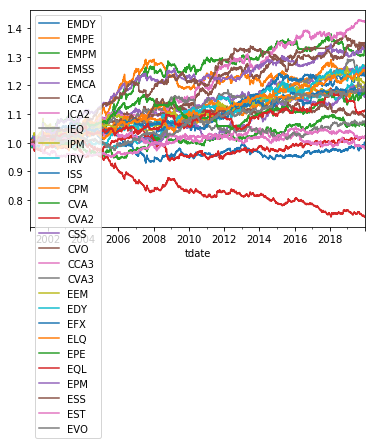

In [89]:
pd.concat(performances, 1).plot()

In [90]:
all_asset_list = [ir_list, commodity_list, emerging_list, equity_list]

In [91]:
TS_position = pd.concat(TS_positions, 1)#[ir_list].stack().sum(1).unstack()
CS_position = pd.concat(CS_positions, 1)#[ir_list].stack().sum(1).unstack()

In [101]:
joint_performances = []
joint_summaries = []

In [102]:
start_date = '2018-12-31'

In [103]:
for k, asset in zip(obj_dict.keys(), all_asset_list):
    obj = obj_dict[k]
    
    obj.strategy_name = 'JOINT_{}'.format(k)
    # 포지션 다 더해서 포트폴리오 생성
    obj.TS_position = TS_position[asset].stack().mean(1).unstack()
    obj.CS_position = CS_position[asset].stack().mean(1).unstack()
    
    tester = Tester(obj)
    tester.set_period(start=start_date, end=end_date)
    tester.run(save_file=False, use_bt= True)
    joint_performances.append(obj.TS_result)
    joint_summaries.append(obj.TS_summary)

2020-02-24 09:57:56,945 - IR_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:56,945 - IR_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:56,947 - IR_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_I TIME SERIES
2020-02-24 09:57:56,947 - IR_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_I TIME SERIES


JOINT_I
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:57:57,356 - IR_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_I CROSS SECTIONAL
2020-02-24 09:57:57,356 - IR_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_I CROSS SECTIONAL


JOINT_I
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:57:57,805 - COMMODITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:57,805 - COMMODITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:57,807 - COMMODITY_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_C TIME SERIES
2020-02-24 09:57:57,807 - COMMODITY_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_C TIME SERIES


JOINT_C
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:57:58,578 - COMMODITY_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_C CROSS SECTIONAL
2020-02-24 09:57:58,578 - COMMODITY_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_C CROSS SECTIONAL


JOINT_C
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:57:59,408 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:59,408 - EMERGING_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:57:59,409 - EMERGING_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_EM TIME SERIES
2020-02-24 09:57:59,409 - EMERGING_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_EM TIME SERIES


JOINT_EM
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:57:59,992 - EMERGING_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_EM CROSS SECTIONAL
2020-02-24 09:57:59,992 - EMERGING_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_EM CROSS SECTIONAL


JOINT_EM
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:58:00,662 - EQUITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:58:00,662 - EQUITY_ALL - INFO - [STEP 6] START BACKTEST
2020-02-24 09:58:00,663 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_E TIME SERIES
2020-02-24 09:58:00,663 - EQUITY_ALL - INFO - [STEP 6 - 1] BACKTEST JOINT_E TIME SERIES


JOINT_E
0% [############################# ] 100% | ETA: 00:00:00

2020-02-24 09:58:01,336 - EQUITY_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_E CROSS SECTIONAL
2020-02-24 09:58:01,336 - EQUITY_ALL - INFO - [STEP 6 - 2] BACKTEST JOINT_E CROSS SECTIONAL


JOINT_E
0% [############################# ] 100% | ETA: 00:00:00

In [104]:
pd.concat(joint_summaries, 1)

,JOINT_I,JOINT_C,JOINT_EM,JOINT_E
start,2018-12-30 00:00:00,2018-12-30 00:00:00,2018-12-30 00:00:00,2018-12-30 00:00:00
end,2019-12-31 00:00:00,2019-12-31 00:00:00,2019-12-31 00:00:00,2019-12-31 00:00:00
rf,0,0,0,0
total_return,-0.00148487,-0.00194945,0.00267549,0.000494867
cagr,-0.00148183,-0.00194546,0.00267,0.000493853
max_drawdown,-0.00816983,-0.0119681,-0.0074703,-0.00879776
calmar,-0.181379,-0.162554,0.357415,0.0561339
mtd,0.000289639,-0.00574144,0.00507614,0.000730057
three_month,0.000360504,-0.00745231,0.00595507,0.000710368
six_month,0.00215082,-0.00649985,0.00302357,0.000292112


In [17]:
pd.concat(joint_summaries, 1)

,JOINT_I,JOINT_C,JOINT_EM,JOINT_E
start,2000-12-31 00:00:00,2000-12-31 00:00:00,2000-12-31 00:00:00,2000-12-31 00:00:00
end,2019-05-09 00:00:00,2019-05-09 00:00:00,2019-05-09 00:00:00,2019-05-09 00:00:00
rf,0,0,0,0
total_return,0.247563,0.102032,0.100508,0.213091
cagr,0.0121258,0.00530812,0.00523232,0.0105816
max_drawdown,-0.0138309,-0.0160484,-0.020339,-0.0123358
calmar,0.876719,0.330756,0.257255,0.8578
mtd,-0.00187486,0.00170575,-0.00372429,-0.00103819
three_month,-0.00316124,0.0115482,-0.00388137,0.00127728
six_month,0.0106509,0.00520739,-0.00372396,0.00122145


In [105]:
pd.concat(joint_performances, 1).iplot()

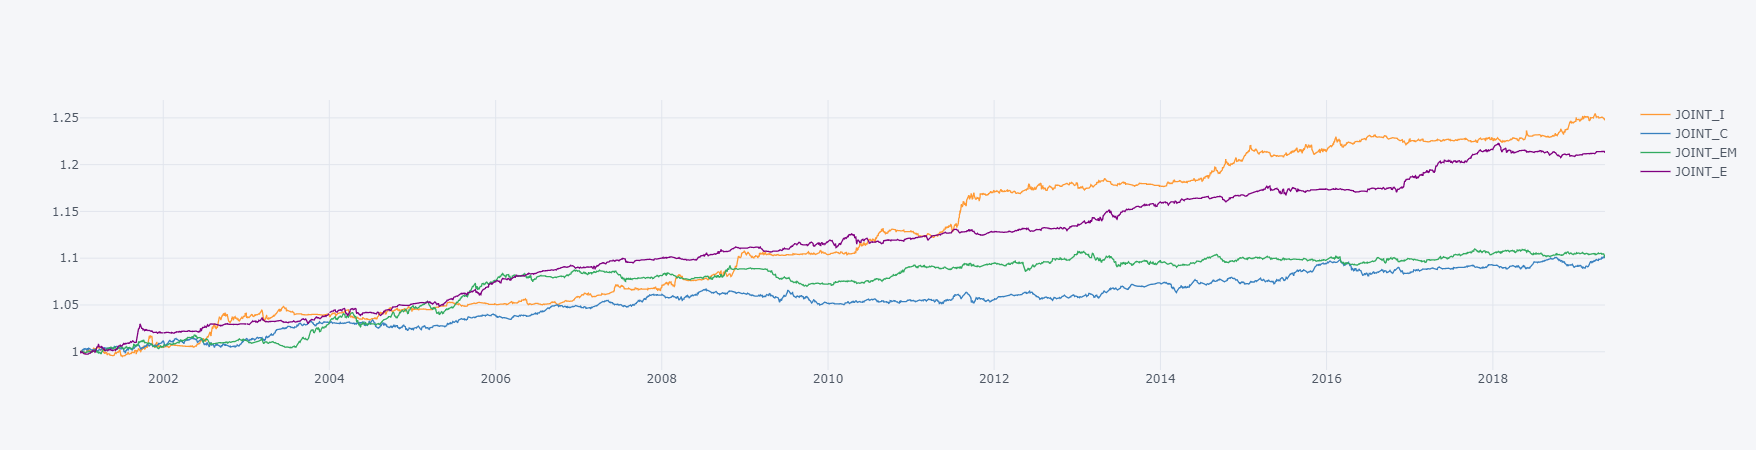

In [19]:
pd.concat(joint_performances, 1).iplot()